## Intoduction to the Data

I"ll focus on credit modelling, a well known data science problem that focuses on modeling a borrower's credit risk. Credit has played a key role in the economy for centuries and some form of credit has existed since the beginning of commerce. 

I'll be working with financial lending data from Lending Club. Lending Club is a marketplace for personal loans that matches borrowers who are seeking a loan with investors looking to lend money and make a return. 

Each borrower fills out a comprehensive application, providing their past financial history, the reason for the loan, and more. Lending Club evaluates each borrower's credit score using past historical data (and their own data science process!) and assign an interest rate to the borrower. 

A higher interest rate means that the borrower is riskier and more unlikely to pay back the loan while a lower interest rate means that the borrower has a good credit history is more likely to pay back the loan. The interest rates range from 5.32% all the way to 30.99% and each borrower is given a grade according to the interest rate they were assigned. If the borrower accepts the interest rate, then the loan is listed on the Lending Club marketplace.

Investors are primarily interested in receiveing a return on their investments. Approved loans are listed on the Lending Club website, where qualified investors can browse recently approved loans, the borrower's credit score, the purpose for the loan, and other information from the application. Once they're ready to back a loan, they select the amount of money they want to fund. Once a loan's requested amount is fully funded, the borrower receives the money they requested minus the origination fee that Lending Club charges.

The borrower then makes monthly payments back to Lending Club either over 36 months or over 60 months. Lending Club redistributes these payments to the investors. This means that investors don't have to wait until the full amount is paid off to start to see money back. If a loan is fully paid off on time, the investors make a return which corresponds to the interest rate the borrower had to pay in addition the requested amount. Many loans aren't completely paid off on time, however, and some borrowers default on the loan.

While Lending Club has to be extremely savvy and rigorous with their credit modelling, investors on Lending Club need to be equally as savvy about determining which loans are more likely to be paid off. While at first, you may wonder why investors would put money into anything but low interest loans. The incentive investors have to back higher interest loans is, well, the higher interest! If investors believe the borrower can pay back the loan, even if he or she has a weak financial history, then investors can make more money through the larger additional amount the borrower has to pay.

Most investors use a portfolio strategy to invest small amounts in many loans, with healthy mixes of low, medium, and interest loans. 

In this project, I'll focus on the mindset of a conservative investor who only wants to invest in the loans that have a good chance of being paid off on time. To do that, we'll need to first understand the features in the dataset and then experiment with building machine learning models that reliably predict if a loan will be paid off or not.

In this project, I'll:

- Prepare the data for machine learning
- Train a model
- Measure the accuracy of the model

Lending Club releases data for all of the approved and declined loan applications periodically on their website.

I'll use the data dictionary to understand the different features of the dataset

In [100]:
import pandas as pd
loans = pd.read_csv("loans_2007.csv")
loans.drop_duplicates()
print(loans.iloc[0])
print(loans.shape[1])


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


id                                1077501
member_id                      1.2966e+06
loan_amnt                            5000
funded_amnt                          5000
funded_amnt_inv                      4975
term                            36 months
int_rate                           10.65%
installment                        162.87
grade                                   B
sub_grade                              B2
emp_title                             NaN
emp_length                      10+ years
home_ownership                       RENT
annual_inc                          24000
verification_status              Verified
issue_d                          Dec-2011
loan_status                    Fully Paid
pymnt_plan                              n
purpose                       credit_card
title                            Computer
zip_code                            860xx
addr_state                             AZ
dti                                 27.65
delinq_2yrs                       

In [101]:
print(loans.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42538 entries, 0 to 42537
Data columns (total 52 columns):
id                            42538 non-null object
member_id                     42535 non-null float64
loan_amnt                     42535 non-null float64
funded_amnt                   42535 non-null float64
funded_amnt_inv               42535 non-null float64
term                          42535 non-null object
int_rate                      42535 non-null object
installment                   42535 non-null float64
grade                         42535 non-null object
sub_grade                     42535 non-null object
emp_title                     39909 non-null object
emp_length                    41423 non-null object
home_ownership                42535 non-null object
annual_inc                    42531 non-null float64
verification_status           42535 non-null object
issue_d                       42535 non-null object
loan_status                   42535 non-null object
p

## Features Selection

In selecting the appropriate features to train using a machine learning model, I'll pay attention to features that:

- leak information from the future (after the loan has already been funded)
- don't affect a borrower's ability to pay back a loan (e.g. a randomly generated ID value by Lending Club)
- require more data or a lot of processing to turn into a useful feature
- contain redundant information

and drop any column that has it 

I'll especially pay attention to data leakage, since it can cause our model to overfit. This is because the model would be using data about the target column that wouldn't be available when we're using the model on future loans

After analyzing each column, we can conclude that the following features need to be removed:

- id: randomly generated field by Lending Club for unique identification purposes only
- member_id: also a randomly generated field by Lending Club for unique identification purposes only
- funded_amnt: leaks data from the future (after the loan is already started to be funded)
- funded_amnt_inv: also leaks data from the future (after the loan is already started to be funded)
- grade: contains redundant information as the interest rate column (int_rate)
- sub_grade: also contains redundant information as the interest rate column (int_rate)
- emp_title: requires other data and a lot of processing to potentially be useful
- issue_d: leaks data from the future (after the loan is already completed funded)
- zip_code: redundant with the addr_state column since only the first 3 digits of the 5 digit zip code are visible (which only can be used to identify the state the borrower lives in)
- out_prncp: leaks data from the future, (after the loan already started to be paid off)
- out_prncp_inv: also leaks data from the future, (after the loan already started to be paid off)
- total_pymnt: also leaks data from the future, (after the loan already started to be paid off)
- total_pymnt_inv: also leaks data from the future, (after the loan already started to be paid off)
- total_rec_prncp: also leaks data from the future, (after the loan already started to be paid off)
- total_rec_int: leaks data from the future, (after the loan already started to be paid off),
- total_rec_late_fee: also leaks data from the future, (after the loan already started to be paid off),
- recoveries: also leaks data from the future, (after the loan already started to be paid off),
- collection_recovery_fee: also leaks data from the future, (after the loan already started to be paid off),
- last_pymnt_d: also leaks data from the future, (after the loan already started to be paid off),
- last_pymnt_amnt: also leaks data from the future, (after the loan already started to be paid off).

In [102]:
loans = loans.drop(["id", "member_id", "funded_amnt", "funded_amnt_inv", "grade", "sub_grade", "emp_title", "issue_d"], axis=1)

In [103]:
loans = loans.drop(["zip_code", "out_prncp", "out_prncp_inv", "total_pymnt", "total_pymnt_inv", "total_rec_prncp"], axis=1)

In [104]:
loans = loans.drop(["total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt"], axis=1)

In [105]:
print(loans.iloc[0])
print(loans.shape[1])

loan_amnt                            5000
term                            36 months
int_rate                           10.65%
installment                        162.87
emp_length                      10+ years
home_ownership                       RENT
annual_inc                          24000
verification_status              Verified
loan_status                    Fully Paid
pymnt_plan                              n
purpose                       credit_card
title                            Computer
addr_state                             AZ
dti                                 27.65
delinq_2yrs                             0
earliest_cr_line                 Jan-1985
inq_last_6mths                          1
open_acc                                3
pub_rec                                 0
revol_bal                           13648
revol_util                          83.7%
total_acc                               9
initial_list_status                     f
last_credit_pull_d               J

### Choosing the Target Column for Modelling

I'd use the loan_status column, since it's the only column that directly describes if a loan was paid off on time, had delayed payments, or was defaulted on the borrower. 

Currently, this column contains text values and we need to convert it to a numerical one for training a model. Let's explore the different values in this column and come up with a strategy for converting the values in this column.

In [106]:
print(loans['loan_status'].value_counts())

Fully Paid                                             33136
Charged Off                                             5634
Does not meet the credit policy. Status:Fully Paid      1988
Current                                                  961
Does not meet the credit policy. Status:Charged Off      761
Late (31-120 days)                                        24
In Grace Period                                           20
Late (16-30 days)                                          8
Default                                                    3
Name: loan_status, dtype: int64


From a Conservative Investor's perspective, I'm interested in trying to predict which loans will be paid off on time and which ones won't be. Only the Fully Paid and Charged Off values describe the final outcome of the loan. 

Since we're interested in being able to predict which of these 2 values a loan will fall under, we can treat the problem as a binary classification one.

In [107]:
loans = loans[(loans['loan_status'] == "Fully Paid") | (loans['loan_status'] == "Charged Off")]

status_replace = {
    "loan_status" : {
        "Fully Paid": 1,
        "Charged Off": 0,
    }
}

loans = loans.replace(status_replace)

In [108]:
print(loans['loan_status'].value_counts())

1    33136
0     5634
Name: loan_status, dtype: int64


As shown in the above code block, there is class imbalance between the positive and negative cases. 
While there are 33,136 loans that have been fully paid off, there are only 5,634 that were charged off. This class imbalance will result in the model having strong bias towards predicting the class with more observations in the training set and will rarely predict the class with less observations. 
The stronger the imbalance, the more biased the model becomes.


*I'll take that into consideration, when training the model*

### Removing single value columns

Because of large nature of the dataset, 
I'll look for any columns that contain only one unique value and remove them. These columns won't be useful for the model since they don't add any information to each loan application. In addition, removing these columns will reduce the number of columns.

In [109]:
orig_columns = loans.columns
drop_columns = []
for col in orig_columns:
    col_series = loans[col].dropna().unique()
    if len(col_series) == 1:
        drop_columns.append(col)
loans = loans.drop(drop_columns, axis=1)
print(drop_columns)

['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']


## Handling missing values

In [110]:
null_counts = loans.isnull().sum()
print(null_counts)

loan_amnt                  0
term                       0
int_rate                   0
installment                0
emp_length              1036
home_ownership             0
annual_inc                 0
verification_status        0
loan_status                0
purpose                    0
title                     11
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                50
total_acc                  0
last_credit_pull_d         2
pub_rec_bankruptcies     697
dtype: int64


In [111]:
print(loans.pub_rec_bankruptcies.value_counts(normalize=True, dropna=False) *100)

0.0    93.943771
1.0     4.245551
NaN     1.797782
2.0     0.012897
Name: pub_rec_bankruptcies, dtype: float64


From the above code block, I can see that this column offers very little variability, nearly 94% of values are in the same category. It probably won't have much predictive value. so I'll drop it.

In [112]:
print(loans.title.value_counts(normalize=True, dropna=False) *100)

Debt Consolidation                                           5.432035
Debt Consolidation Loan                                      4.212020
Personal Loan                                                1.655920
Consolidation                                                1.276760
debt consolidation                                           1.250967
Credit Card Consolidation                                    0.910498
Home Improvement                                             0.892443
Debt consolidation                                           0.835698
Small Business Loan                                          0.799587
Credit Card Loan                                             0.786691
Personal                                                     0.778953
Consolidation Loan                                           0.647408
Home Improvement Loan                                        0.603559
personal loan                                                0.588084
personal            

From the above code block, I can see that this column really has a nuanced data, so filling in the NaN values may distort the information the Series is trying to communicate. So I'd rather drop the rows containing the NaN values

same for last_credit_pull_d column and revol_util

In [113]:
print(loans.emp_length.value_counts(normalize=True, dropna=False) *100)

10+ years    22.045396
< 1 year     11.676554
2 years      11.111684
3 years      10.384318
4 years       8.671653
5 years       8.277018
1 year        8.209956
6 years       5.625484
7 years       4.431261
8 years       3.724529
9 years       3.169977
NaN           2.672169
Name: emp_length, dtype: float64


Domain knowledge tells us that employment length is frequently used in assessing how risky a potential borrower is, so I'll keep this column despite its relatively large amount of missing values & also since the NaN values constitute the least proportion

In [114]:
loans = loans.drop("pub_rec_bankruptcies", axis=1)
loans = loans.dropna(axis=0)
print(loans.dtypes.value_counts())


object     11
float64    10
int64       1
dtype: int64


## Data Cleaning

In [115]:
object_columns_df = loans.select_dtypes(include=["object"])
print(object_columns_df.iloc[0])

term                     36 months
int_rate                    10.65%
emp_length               10+ years
home_ownership                RENT
verification_status       Verified
purpose                credit_card
title                     Computer
addr_state                      AZ
earliest_cr_line          Jan-1985
revol_util                   83.7%
last_credit_pull_d        Jun-2016
Name: 0, dtype: object


- Some of the columns seem like they represent categorical values, but we should confirm by checking the number of unique values in those columns

- There are also some columns that represent numeric values, that need to be converted


- Based on the first row's values for purpose and title, it seems like these columns could reflect the same information. Let's explore the unique value counts separately to confirm if this is true.

- Lastly, some of the columns contain date values that would require a good amount of feature engineering for them to be potentially useful



In [116]:
cols = ['home_ownership', 'verification_status', 'emp_length', 'term', 'addr_state']
for c in cols:
    print(loans[c].value_counts())

RENT        18112
MORTGAGE    16686
OWN          2778
OTHER          96
NONE            3
Name: home_ownership, dtype: int64
Not Verified       16281
Verified           11856
Source Verified     9538
Name: verification_status, dtype: int64
10+ years    8545
< 1 year     4513
2 years      4303
3 years      4022
4 years      3353
5 years      3202
1 year       3176
6 years      2177
7 years      1714
8 years      1442
9 years      1228
Name: emp_length, dtype: int64
 36 months    28234
 60 months     9441
Name: term, dtype: int64
CA    6776
NY    3614
FL    2704
TX    2613
NJ    1776
IL    1447
PA    1442
VA    1347
GA    1323
MA    1272
OH    1149
MD    1008
AZ     807
WA     788
CO     748
NC     729
CT     711
MI     678
MO     648
MN     581
NV     466
SC     454
WI     427
OR     422
AL     420
LA     420
KY     311
OK     285
KS     249
UT     249
AR     229
DC     209
RI     194
NM     180
WV     164
HI     162
NH     157
DE     110
MT      77
AK      76
WY      76
SD      60
VT  

The home_ownership, verification_status, emp_length, term, and addr_state columns all contain multiple discrete values. I will clean the emp_length column and treat it as a numerical one since the values have ordering (2 years of employment is less than 8 years).

In [117]:
print(loans["title"].value_counts())
print(loans["purpose"].value_counts())

Debt Consolidation                                  2068
Debt Consolidation Loan                             1599
Personal Loan                                        624
Consolidation                                        488
debt consolidation                                   466
Credit Card Consolidation                            345
Home Improvement                                     336
Debt consolidation                                   314
Small Business Loan                                  298
Credit Card Loan                                     294
Personal                                             290
Consolidation Loan                                   250
Home Improvement Loan                                228
personal loan                                        219
Loan                                                 202
Wedding Loan                                         199
personal                                             198
Car Loan                       

It seems like the purpose and title columns do contain overlapping information but I'll keep the purpose column since it contains a few discrete values. 

In addition, the title column has data quality issues since many of the values are repeated with slight modifications (e.g. Debt Consolidation and Debt Consolidation Loan and debt consolidation).

Lastly, the addr_state column contains many discrete values and we'd need to add 49 dummy variable columns to use it for classification. This would make our Dataframe much larger and could slow down how quickly the code runs. So I'll remove this column from consideration.

In [118]:
mapping_dict = {
    "emp_length": {
        "10+ years": 10,
        "9 years": 9,
        "8 years": 8,
        "7 years": 7,
        "6 years": 6,
        "5 years": 5,
        "4 years": 4,
        "3 years": 3,
        "2 years": 2,
        "1 year": 1,
        "< 1 year": 0,
        "n/a": 0
    }
}
loans = loans.drop(["last_credit_pull_d", "earliest_cr_line", "addr_state", "title"], axis=1)
loans["int_rate"] = loans["int_rate"].str.rstrip("%").astype("float")
loans["revol_util"] = loans["revol_util"].str.rstrip("%").astype("float")
loans = loans.replace(mapping_dict)

In [119]:
print(loans["emp_length"].value_counts())

10    8545
0     4513
2     4303
3     4022
4     3353
5     3202
1     3176
6     2177
7     1714
8     1442
9     1228
Name: emp_length, dtype: int64


## Engineering New Features

I'll encode the home_ownership, verification_status, purpose, and term columns as dummy variables  

In [120]:
cat_columns = ["home_ownership", "verification_status", "purpose", "term"]
dummy_df = pd.get_dummies(loans[cat_columns])
loans = pd.concat([loans, dummy_df], axis=1)
loans = loans.drop(cat_columns, axis=1)

In [121]:
loans

,loan_amnt,int_rate,installment,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,...,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months
0,5000.0,10.65,162.87,10,24000.00,1,27.65,0.0,1.0,3.0,...,0,0,0,0,0,0,0,0,1,0
1,2500.0,15.27,59.83,0,30000.00,0,1.00,0.0,5.0,3.0,...,0,0,0,0,0,0,0,0,0,1
2,2400.0,15.96,84.33,10,12252.00,1,8.72,0.0,2.0,2.0,...,0,0,0,0,0,1,0,0,1,0
3,10000.0,13.49,339.31,10,49200.00,1,20.00,0.0,1.0,10.0,...,0,0,0,1,0,0,0,0,1,0
5,5000.0,7.90,156.46,3,36000.00,1,11.20,0.0,3.0,9.0,...,0,0,0,0,0,0,0,1,1,0
6,7000.0,15.96,170.08,8,47004.00,1,23.51,0.0,1.0,7.0,...,0,0,0,0,0,0,0,0,0,1
7,3000.0,18.64,109.43,9,48000.00,1,5.35,0.0,2.0,4.0,...,0,0,0,0,0,0,0,0,1,0
8,5600.0,21.28,152.39,4,40000.00,0,5.55,0.0,2.0,11.0,...,0,0,0,0,0,1,0,0,0,1
9,5375.0,12.69,121.45,0,15000.00,0,18.08,0.0,0.0,2.0,...,0,0,0,1,0,0,0,0,0,1
10,6500.0,14.65,153.45,5,72000.00,1,16.12,0.0,2.0,14.0,...,0,0,0,0,0,0,0,0,0,1


In [128]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37675 entries, 0 to 39785
Data columns (total 38 columns):
loan_amnt                              37675 non-null float64
int_rate                               37675 non-null float64
installment                            37675 non-null float64
emp_length                             37675 non-null object
annual_inc                             37675 non-null float64
loan_status                            37675 non-null int64
dti                                    37675 non-null float64
delinq_2yrs                            37675 non-null float64
inq_last_6mths                         37675 non-null float64
open_acc                               37675 non-null float64
pub_rec                                37675 non-null float64
revol_bal                              37675 non-null float64
revol_util                             37675 non-null float64
total_acc                              37675 non-null float64
home_ownership_MORTGAGE   

In [148]:
loans_features = loans.drop(["loan_status"], axis=1)

In [149]:
loans_features.columns

Index(['loan_amnt', 'int_rate', 'installment', 'emp_length', 'annual_inc',
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'home_ownership_MORTGAGE',
       'home_ownership_NONE', 'home_ownership_OTHER', 'home_ownership_OWN',
       'home_ownership_RENT', 'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'term_ 36 months',
       'term_ 60 months'],
      dtype='object')

## Finding the most Relevant Features

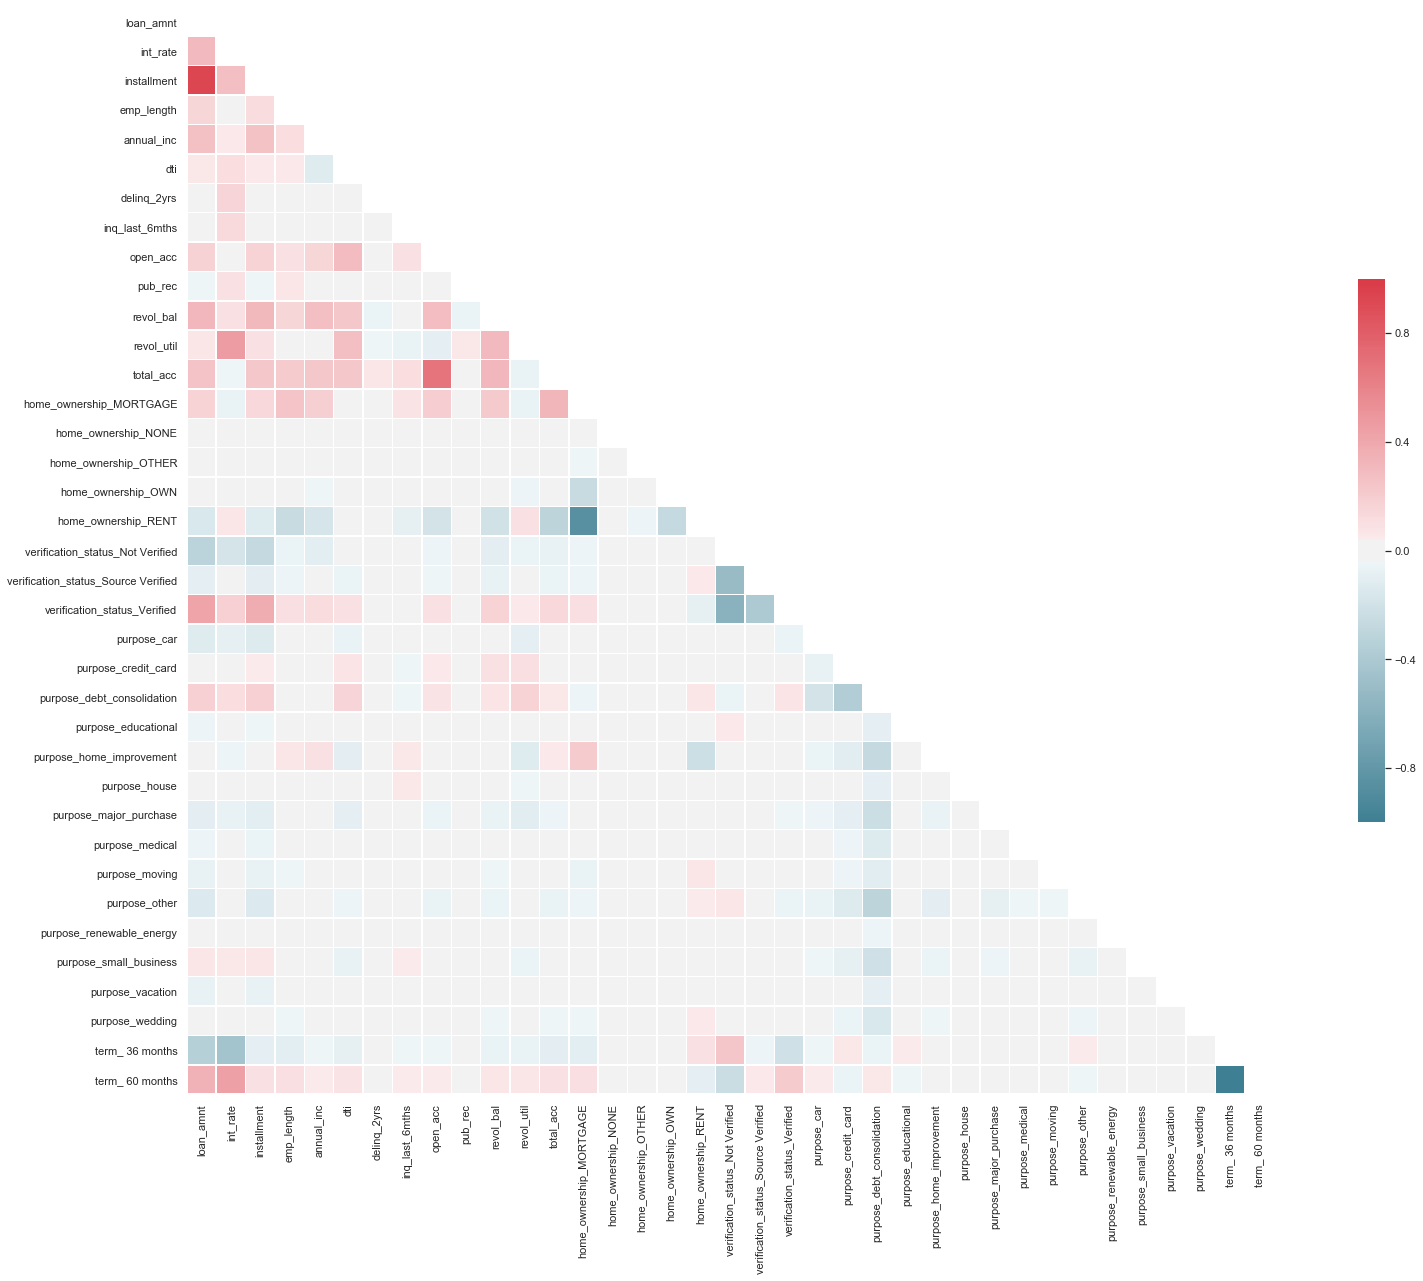

In [150]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

def plot_correlation_heatmap(df):
    corr = df.corr()
    
    sns.set(style="white")
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    f, ax = plt.subplots(figsize=(30, 20))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)


    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.show()

columns = loans_features
plot_correlation_heatmap(columns)

The darker colors indicates strong correlation between the columns

## Final Feature Selection using RFECV

In [151]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression


cols = ['loan_amnt', 'int_rate', 'emp_length', 'annual_inc',
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'home_ownership_MORTGAGE',
       'home_ownership_NONE', 'home_ownership_OTHER',
       'home_ownership_RENT', 'verification_status_Not Verified',
       'verification_status_Source Verified', 
       'purpose_car', 'purpose_credit_card', 
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding']
all_X = loans_features[cols]
all_y = loans["loan_status"]
lr = LogisticRegression()
selector = RFECV(lr,cv=3)
selector.fit(all_X,all_y)

optimized_columns = all_X.columns[selector.support_]
print(optimized_columns)

Index(['loan_amnt', 'int_rate', 'emp_length', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_util', 'total_acc',
       'home_ownership_MORTGAGE', 'home_ownership_RENT',
       'verification_status_Not Verified',
       'verification_status_Source Verified', 'purpose_car',
       'purpose_credit_card', 'purpose_educational',
       'purpose_home_improvement', 'purpose_major_purchase', 'purpose_medical',
       'purpose_moving', 'purpose_other', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding'],
      dtype='object')


### Picking an Error Metric

Before we dive into predicting loan_status with machine learning, We need to choose an error metric

An error metric will help us figure out when our model is performing well, and when it's performing poorly - if our algorithm will make us money or lose us money. 
 
A conservative investor would want to minimize risk, and avoid false positives as much as possible. They'd be more okay with missing out on opportunities (false negatives) than they would be with funding a risky loan (false positives).



I'll use metrics that tell us the number of false positives and false negatives

## Training a Model with Logistic Regression

To solve this problem of class imbalance, I'll set the class_weight parameter to balanced when creating the LogisticRegression instance - tells scikit-learn to penalize the misclassification of the minority class during the training process

In [152]:
X = loans_features[optimized_columns]
Y = loans["loan_status"]
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
lr = LogisticRegression(class_weight="balanced")
predictions = cross_val_predict(lr, X, Y, cv=3)
predictions = pd.Series(predictions)

# False positives.
fp_filter = (predictions == 1) & (loans["loan_status"] == 0)
fp = len(predictions[fp_filter])

# True positives.
tp_filter = (predictions == 1) & (loans["loan_status"] == 1)
tp = len(predictions[tp_filter])

# False negatives.
fn_filter = (predictions == 0) & (loans["loan_status"] == 1)
fn = len(predictions[fn_filter])

# True negatives
tn_filter = (predictions == 0) & (loans["loan_status"] == 0)
tn = len(predictions[tn_filter])

# Rates
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)

print(tpr)
print(fpr)

0.6360341943876603
0.37372425310818336


 From a conservative investor's standpoint, it's reassuring that the false positive rate is lower because it means that they'll be able to do a better job at avoiding bad loans than if we funded everything.
 
I will try to lower the false positive rate further by assigning a harsher penalty for misclassifying the negative class.

In [153]:
penalty = {
    0: 11.5,
    1: 1
}

lr = LogisticRegression(class_weight=penalty)
predictions = cross_val_predict(lr, X, Y, cv=3)
predictions = pd.Series(predictions)

# False positives.
fp_filter = (predictions == 1) & (loans["loan_status"] == 0)
fp = len(predictions[fp_filter])

# True positives.
tp_filter = (predictions == 1) & (loans["loan_status"] == 1)
tp = len(predictions[tp_filter])

# False negatives.
fn_filter = (predictions == 0) & (loans["loan_status"] == 1)
fn = len(predictions[fn_filter])

# True negatives
tn_filter = (predictions == 0) & (loans["loan_status"] == 0)
tn = len(predictions[tn_filter])

# Rates
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)

print(tpr)
print(fpr)

0.24555534906770737
0.07626646873260345


Assigning manual penalties lowered the false positive rate to about 8%, and thus lowered our risk. Note that this comes at the expense of true positive rate. 

While we have fewer false positives, we're also missing opportunities to fund more loans and potentially make more money. Given that we're approaching this as a conservative investor, this strategy makes sense, but it's worth keeping in mind the tradeoffs.